<a href="https://colab.research.google.com/github/Akshaysarsamkar/datamining/blob/main/playTennis_dicisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Import DataSet

In [ ]:
df = pd.DataFrame({
   'outlook' : [
"Sunny",
"Sunny",
"Overcast",
"Rain",
"Rain",
"Rain",
"Overcast",
"Sunny",
"Sunny",
"Rain",
"Sunny",
"Overcast",
"Overcast",
"Rain" ],

'Temperature' : [
"Hot",
"Hot",
"Hot",
"Mild",
"Cool",
"Cool",
"Cool",
"Mild",
"Cool",
"Mild",
"Mild",
"Mild",
"Hot",
"Mild"],

'Humidity' : [
"High",
"High",
"High",
"High",
"Normal",
"Normal",
"Normal",
"High",
"Normal",
"Normal",
"Normal",
"High",
"Normal",
"High"
],

'Wind': [
"Weak",
"Strong",
"Weak",
"Weak",
"Weak",
"Strong",
"Strong",
"Weak",
"Weak",
"Weak",
"Strong",
"Strong",
"Weak",
"Strong"
],

'PlayTennis': [
"No",
"No",
"Yes",
"Yes",
"Yes",
"No",
"Yes",
"No",
"Yes",
"Yes",
"Yes",
"Yes",
"Yes",
"No"
]

})


print (df)

     outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No


In [ ]:
print (type(df))

<class 'pandas.core.frame.DataFrame'>


Extracting Dependents and Independent Variable

In [ ]:
x = df.iloc[:, :-1].values
y = df. iloc[:,4].values
#y = df.PlayTennis.values
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

Manageing Missing Data

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
#imputer. fit(x[:,1:5])
#x[:,1:5] = imputer.transform(x[:, 1:5])

Handing Categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder_x = LabelEncoder ()
x[:, 0]= encoder_x.fit_transform (x[:,0])
#print (x)

x[:,1]= encoder_x.fit_transform (x[:,1])
x[:,2] = encoder_x.fit_transform (x[:, 2])
x[:,3]= encoder_x.fit_transform (x[:,3])
print (x)

[[2 1 0 1]
 [2 1 0 0]
 [0 1 0 1]
 [1 2 0 1]
 [1 0 1 1]
 [1 0 1 0]
 [0 0 1 0]
 [2 2 0 1]
 [2 0 1 1]
 [1 2 1 1]
 [2 2 1 0]
 [0 2 0 0]
 [0 1 1 1]
 [1 2 0 0]]


In [ ]:
encoder_y = LabelEncoder ()
encoder_y.fit_transform (y)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

 Splitting the Dataset into Training and Testing Datasets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

In [ ]:
x_train

array([[0, 2, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 0],
       [1, 2, 1, 1],
       [2, 1, 0, 0],
       [2, 2, 0, 1],
       [2, 2, 1, 0],
       [1, 2, 0, 1],
       [2, 1, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 1, 1]], dtype=object)

In [ ]:
x_test

array([[2, 0, 1, 1],
       [0, 0, 1, 0],
       [1, 0, 1, 1]], dtype=object)

In [ ]:
y_test

array(['Yes', 'Yes', 'Yes'], dtype=object)

In [ ]:
y_train

array(['Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes'], dtype=object)

Feature Scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ts_x = StandardScaler()
x_train =ts_x.fit_transform(x_train)
x_train

array([[-1.3764944 ,  0.83205029, -0.75592895, -1.09544512],
       [-1.3764944 , -0.69337525, -0.75592895,  0.91287093],
       [-0.11470787,  0.83205029, -0.75592895, -1.09544512],
       [-0.11470787,  0.83205029,  1.32287566,  0.91287093],
       [ 1.14707867, -0.69337525, -0.75592895, -1.09544512],
       [ 1.14707867,  0.83205029, -0.75592895,  0.91287093],
       [ 1.14707867,  0.83205029,  1.32287566, -1.09544512],
       [-0.11470787,  0.83205029, -0.75592895,  0.91287093],
       [ 1.14707867, -0.69337525, -0.75592895,  0.91287093],
       [-0.11470787, -2.21880078,  1.32287566, -1.09544512],
       [-1.3764944 , -0.69337525,  1.32287566,  0.91287093]])

In [ ]:
x_test = ts_x.transform(x_test)
x_test

array([[ 1.14707867, -2.21880078,  1.32287566,  0.91287093],
       [-1.3764944 , -2.21880078,  1.32287566, -1.09544512],
       [-0.11470787, -2.21880078,  1.32287566,  0.91287093]])

Dicision Tree continues

Fitting a Decision-Tree algorithm to the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classfier = DecisionTreeClassifier (criterion='entropy', random_state=0)

In [ ]:
classfier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the test result

In [ ]:
y_pred= classfier.predict(x_test)
y_pred

array(['No', 'Yes', 'No'], dtype=object)

In [ ]:
x_test

array([[ 1.14707867, -2.21880078,  1.32287566,  0.91287093],
       [-1.3764944 , -2.21880078,  1.32287566, -1.09544512],
       [-0.11470787, -2.21880078,  1.32287566,  0.91287093]])

In [ ]:
classfier.score(x_test, y_test)

0.3333333333333333

[Text(0.3333333333333333, 0.9166666666666666, 'x[0] <= -0.746\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.16666666666666666, 0.75, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.75, 'x[1] <= 0.069\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.3333333333333333, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[2] <= 0.283\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.4166666666666667, 'x[0] <= 0.516\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.25, 'x[3] <= -0.091\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue 

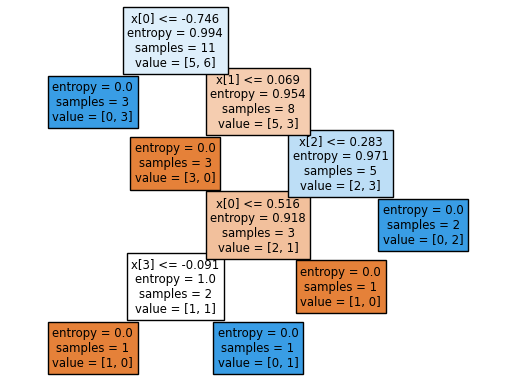

In [ ]:
from sklearn import tree
tree.plot_tree(classfier,filled=True)

4. Test accuracy of the result (Creation of Confusion matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[0, 0],
       [2, 1]])

Visualizing the training set result:

In [ ]:
from matplotlib.colors import ListedColormap